In [1]:
# import splinter and BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import style
import matplotlib.pyplot as plt

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
#target URL Method 1
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

In [4]:
# read table(s) from the website as a pd.DataFrame
pd_mars_df = pd.read_html(url)[0]
pd_mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [5]:
#Change the data type 
pd_mars_df['terrestrial_date'] = pd.to_datetime(pd_mars_df['terrestrial_date'])
pd_mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [6]:
#method 2
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
html = browser.html
soup = soup(html,'html.parser')

In [7]:
# find all rows with a line of code
row_divs = soup.find_all('tr', class_="data-row")

In [8]:
#scraped the rows into a single page
for row_divs in row_divs:
    print(row_divs.text)


2
2012-08-16
10
155
6
-75.0
739.0


13
2012-08-17
11
156
6
-76.0
740.0


24
2012-08-18
12
156
6
-76.0
741.0


35
2012-08-19
13
157
6
-74.0
732.0


46
2012-08-20
14
157
6
-74.0
740.0


57
2012-08-21
15
158
6
-78.0
740.0


68
2012-08-22
16
158
6
-77.0
740.0


79
2012-08-23
17
159
6
-76.0
742.0


112
2012-08-27
21
161
6
-74.0
741.0


114
2012-08-28
22
162
6
-74.0
742.0


123
2012-08-29
23
162
6
-75.0
741.0


134
2012-08-30
24
163
6
-75.0
742.0


145
2012-08-31
25
163
6
-75.0
743.0


156
2012-09-01
26
164
6
-76.0
745.0


163
2012-09-02
27
164
6
-75.0
743.0


170
2012-09-03
28
165
6
-75.0
745.0


171
2012-09-04
29
166
6
-75.0
747.0


172
2012-09-05
30
166
6
-74.0
747.0


173
2012-09-06
31
167
6
-74.0
745.0


175
2012-09-08
33
168
6
-73.0
748.0


176
2012-09-10
34
168
6
-73.0
748.0


177
2012-09-11
35
169
6
-73.0
749.0


178
2012-09-12
36
169
6
-73.0
750.0


179
2012-09-13
37
170
6
-73.0
750.0


180
2012-09-14
38
171
6
-73.0
750.0


181
2012-09-15
39
171
6
-75.0
751.0


182
2012-09-16
40
17



1443
2016-11-17
1523
263
9
-77.0
905.0


1444
2016-11-18
1524
263
9
-76.0
904.0


1445
2016-11-20
1525
264
9
-74.0
902.0


1446
2016-11-21
1526
265
9
-72.0
900.0


1449
2016-11-22
1527
265
9
-71.0
900.0


1450
2016-11-23
1528
266
9
-72.0
898.0


1451
2016-11-24
1529
267
9
-73.0
900.0


1452
2016-11-25
1530
267
9
-71.0
899.0


1447
2016-11-26
1531
268
9
-76.0
900.0


1448
2016-11-27
1532
268
9
-72.0
900.0


1453
2016-11-28
1533
269
9
-72.0
896.0


1454
2016-11-29
1534
270
10
-73.0
898.0


1455
2016-11-30
1535
270
10
-73.0
900.0


1456
2016-12-01
1536
271
10
-71.0
901.0


1458
2016-12-02
1537
272
10
-74.0
900.0


1457
2016-12-03
1538
272
10
-73.0
898.0


1459
2016-12-04
1539
273
10
-74.0
896.0


1460
2016-12-05
1540
274
10
-72.0
896.0


1461
2016-12-06
1541
274
10
-76.0
895.0


1462
2016-12-07
1542
275
10
-73.0
895.0


1464
2016-12-08
1543
276
10
-74.0
896.0


1463
2016-12-09
1544
276
10
-71.0
894.0


1465
2016-12-10
1545
277
10
-73.0
891.0


1467
2016-12-11
1546
277
10
-73.0
889.0


1

In [9]:
pd_mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [10]:
# convert ls data to radians. in order to get the complete number of times it goes around the sun
pd_mars_df['ls_rad'] = pd_mars_df['ls'] * np.pi / 180
pd_mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure,ls_rad
0,2,2012-08-16,10,155,6,-75.0,739.0,2.705260
1,13,2012-08-17,11,156,6,-76.0,740.0,2.722714
2,24,2012-08-18,12,156,6,-76.0,741.0,2.722714
3,35,2012-08-19,13,157,6,-74.0,732.0,2.740167
4,46,2012-08-20,14,157,6,-74.0,740.0,2.740167


In [11]:
# 6. number of Martian months exists on Mars (sorted)
mars_months = np.unique(pd_mars_df['month'])
mars_months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [12]:
# get table headers
headers = list(pd_mars_df)
# 8.figuring out the coldest and warmest months on Mars
mintemp_df = pd_mars_df[headers[2:]].groupby('month', as_index=False).mean().sort_values('min_temp')
mintemp_df

,month,sol,ls,min_temp,pressure,ls_rad
2,3,1204.406250,75.010417,-83.307292,877.322917,1.309179
3,4,1244.500000,104.365979,-82.747423,806.329897,1.821530
1,2,1175.853933,44.258427,-79.932584,889.455056,0.772455
4,5,1182.691275,132.885906,-79.308725,748.557047,2.319297
0,1,1077.574713,15.281609,-77.160920,862.488506,0.266714
5,6,750.829932,164.897959,-75.299320,745.054422,2.878012
11,12,990.951807,344.692771,-74.451807,842.156627,6.016024
6,7,715.105634,194.894366,-72.281690,795.105634,3.401548
10,11,947.224638,314.536232,-71.985507,857.014493,5.489693
9,10,1034.669643,286.330357,-71.982143,887.312500,4.997407


In [13]:
#9 sorting it to get the max min_temp and min min_temp in Mars and which month had them. 
pd_mars_df.loc[(pd_mars_df['min_temp'] == pd_mars_df['min_temp'].min()) | (pd_mars_df['min_temp'] == pd_mars_df['min_temp'].max()), headers[1:]]

,terrestrial_date,sol,ls,month,min_temp,pressure,ls_rad
1093,2015-12-09,1188,79,3,-90.0,881.0,1.378810
1582,2017-05-10,1692,2,1,-62.0,820.0,0.034907


In [14]:
# plot the average minimum daily temperature of all the months
def barplot(x, y, title):
    style.use('fivethirtyeight')
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(x, y)
    ax.set_title(title)
    ax.set_xlabel(f'{title.split()[-2]} {title.split()[-1]}')
    ax.set_xticks(x)
    if 'min temperature' in title.lower():
        ax.set_ylabel('Min Temperature (F)')
        ax.set_yticks(np.arange(0, -91, -10))
    elif 'pressure' in title.lower():
        ax.set_ylabel('Pressure')
        ax.set_yticks(np.arange(0, 1001, 100))
    elif 'longitude' in title.lower():
        ax.set_ylabel('Solar Longitude (rad)')
    else:
        ax.set_ylabel(f'{title.split()[1]} {title.split()[2]} (sols)')
    # Show Figure
    plt.show()

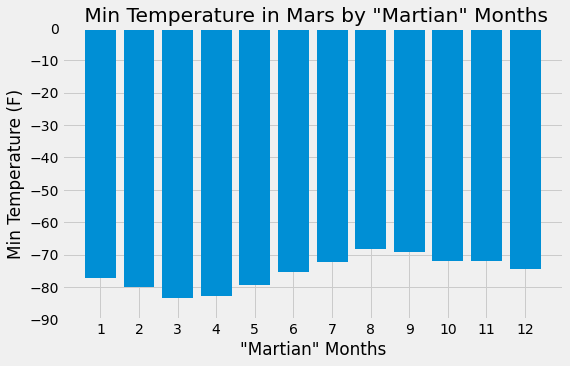

In [15]:
#months with the minimum 
barplot(mintemp_df['month'], mintemp_df['min_temp'],  ' Min Temperature in Mars by "Martian" Months')

In [16]:
# months on Mars with lowest and highest atmospheric pressure
pressure_df = pd_mars_df[headers[2:]].groupby('month', as_index=False).mean().sort_values('pressure')
pressure_df

,month,sol,ls,min_temp,pressure,ls_rad
5,6,750.829932,164.897959,-75.299320,745.054422,2.878012
4,5,1182.691275,132.885906,-79.308725,748.557047,2.319297
6,7,715.105634,194.894366,-72.281690,795.105634,3.401548
3,4,1244.500000,104.365979,-82.747423,806.329897,1.821530
11,12,990.951807,344.692771,-74.451807,842.156627,6.016024
10,11,947.224638,314.536232,-71.985507,857.014493,5.489693
0,1,1077.574713,15.281609,-77.160920,862.488506,0.266714
7,8,795.333333,224.347518,-68.382979,873.829787,3.915603
2,3,1204.406250,75.010417,-83.307292,877.322917,1.309179
9,10,1034.669643,286.330357,-71.982143,887.312500,4.997407


In [17]:
# show which month had the highest atmospheric pressure and which month had the lowest
pd_mars_df.loc[(pd_mars_df['pressure'] == pd_mars_df['pressure'].min()) | (pd_mars_df['pressure'] == pd_mars_df['pressure'].max()), headers[1:]]

,terrestrial_date,sol,ls,month,min_temp,pressure,ls_rad
156,2013-01-27,170,252,9,-66.0,925.0,4.398230
157,2013-01-28,171,253,9,-67.0,925.0,4.415683
766,2014-12-23,846,257,9,-74.0,925.0,4.485496
1866,2018-02-27,1977,135,5,-77.0,727.0,2.356194


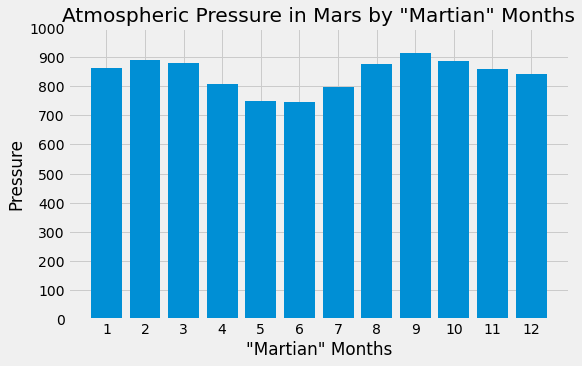

In [18]:
# plot the average atmospheric daily pressure of all the months
barplot(pressure_df['month'], pressure_df['pressure'], 'Atmospheric Pressure in Mars by "Martian" Months')

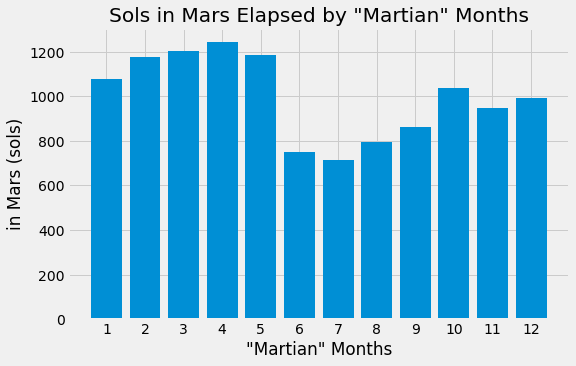

In [19]:
barplot(mintemp_df['month'], mintemp_df['sol'], 'Sols in Mars Elapsed by "Martian" Months')

In [20]:
#10. calculating how many sols there is in a Martian year based on monthly elapsed sols
sols = 0
for mm in mars_months:
    sol_duration = pd_mars_df.loc[pd_mars_df['month'] == mm, 'sol'].max() - pd_mars_df.loc[pd_mars_df['month'] == mm, 'sol'].min()
    sols += (sol_duration / 24.66)
# number of Martian days included in the dataset
print(pd_mars_df['sol'].agg(['max', 'min']))
sol_range = pd_mars_df['sol'].max() - pd_mars_df['sol'].min()

max    1977
min      10
Name: sol, dtype: int64


In [21]:
# calculating total orbital periods (= total Martian years)
mars_year = sol_range/sols
# Visually estimate the result from the daily minimum temperature plots
visual_mars_year = [2.9, 3.0, mars_year]
avg_visual_mars_year = np.mean(visual_mars_year[:2])
avg_mars_year = np.mean(visual_mars_year)
print(
    f'Mars sols in a Martian year (statistical estimate): {sols:.3f}\n'
    f'Mars sols in a Martian year (visual estimate):      {sol_range/avg_visual_mars_year:.3f}\n'
    f'Mars sols in a Martian year (average estimate):     {sol_range/avg_mars_year:.3f}'
)

Mars sols in a Martian year (statistical estimate): 675.710
Mars sols in a Martian year (visual estimate):      666.780
Mars sols in a Martian year (average estimate):     669.730


In [22]:
# number of terrestrial days included in the dataset
print(pd_mars_df['terrestrial_date'].agg(['max', 'min']))
tday_range = (pd_mars_df['terrestrial_date'].max() - pd_mars_df['terrestrial_date'].min()).days

max   2018-02-27
min   2012-08-16
Name: terrestrial_date, dtype: datetime64[ns]


In [23]:
#calculate total terrestrial years in the dataset 'Mars orbits the Sun once = 1 Martian year' 
earth_year = tday_range / 365.25

In [24]:
# try to figure out how many Earth days exist in a Martian year 
visual_sols_to_earthdays = tday_range / avg_visual_mars_year
avg_sols_to_earthdays = tday_range / avg_mars_year
ref_period = 687
percent_visual_period_diff = (visual_sols_to_earthdays / ref_period - 1)*100
percent_avg_period_diff = (avg_sols_to_earthdays / ref_period - 1)*100

In [25]:
# Calculate total years in the dataset and summary results for markdown report
print(
    f'- Exact Earth years in the dataset:                {earth_year:7.3f}\n'
    f'- Martian years in the dataset (visual estimate):  {avg_visual_mars_year:7.3f}\n'
    f'- Martian years in the dataset (average estimate): {avg_mars_year:7.3f}\n'
    f'- Earth days in a Martian year (visual estimate):  {visual_sols_to_earthdays:7.3f} ({percent_visual_period_diff:6.3f}%)\n'
    f'- Earth days in a Martian year (average estimate): {avg_sols_to_earthdays:7.3f} ({percent_avg_period_diff:6.3f}%)'
)

- Exact Earth years in the dataset:                  5.533
- Martian years in the dataset (visual estimate):    2.950
- Martian years in the dataset (average estimate):   2.937
- Earth days in a Martian year (visual estimate):  685.085 (-0.279%)
- Earth days in a Martian year (average estimate): 688.116 ( 0.162%)


In [ ]:
# Export the DataFrame into a CSV file
file_name = '../Mission-to-Mars/mars_data.csv'
pd_mars_df.to_csv(file_name, index=False)

In [26]:
 browser.quit()